## EDA Process

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [194]:
df=pd.read_csv("employee_data.csv")

In [195]:
df.head()

,EmployeeID,Name,Age,Department,Salary_k$,Experience_Years,City,Left_Company
0,1,Employee_1,38.0,Marketing,56.54,26.0,Hyderabad,1
1,2,Employee_2,41.0,Marketing,46.24,28.0,Delhi,1
2,3,Employee_3,56.0,HR,109.45,27.0,Hyderabad,0
3,4,Employee_4,58.0,HR,50.08,34.0,Delhi,0
4,5,Employee_5,54.0,Sales,NaN,7.0,Pune,0


In [196]:
df.dtypes

EmployeeID            int64
Name                 object
Age                 float64
Department           object
Salary_k$           float64
Experience_Years    float64
City                 object
Left_Company          int64
dtype: object

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        205 non-null    int64  
 1   Name              205 non-null    object 
 2   Age               195 non-null    float64
 3   Department        205 non-null    object 
 4   Salary_k$         195 non-null    float64
 5   Experience_Years  195 non-null    float64
 6   City              205 non-null    object 
 7   Left_Company      205 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 12.9+ KB


In [198]:
df.isna().sum()

EmployeeID           0
Name                 0
Age                 10
Department           0
Salary_k$           10
Experience_Years    10
City                 0
Left_Company         0
dtype: int64

In [199]:
df[df.duplicated(keep=False)]

,EmployeeID,Name,Age,Department,Salary_k$,Experience_Years,City,Left_Company
15,16,Employee_16,26.0,HR,95.63,6.0,Pune,1
30,31,Employee_31,41.0,Marketing,96.24,8.0,Hyderabad,0
95,96,Employee_96,41.0,Marketing,65.08,2.0,Mumbai,1
128,129,Employee_129,33.0,Finance,41.23,19.0,Pune,1
158,159,Employee_159,38.0,Finance,80.94,34.0,Mumbai,1
200,96,Employee_96,41.0,Marketing,65.08,2.0,Mumbai,1
201,16,Employee_16,26.0,HR,95.63,6.0,Pune,1
202,31,Employee_31,41.0,Marketing,96.24,8.0,Hyderabad,0
203,159,Employee_159,38.0,Finance,80.94,34.0,Mumbai,1
204,129,Employee_129,33.0,Finance,41.23,19.0,Pune,1


In [200]:
df.drop_duplicates(inplace=True)

In [201]:
df[df.duplicated]

,EmployeeID,Name,Age,Department,Salary_k$,Experience_Years,City,Left_Company


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        200 non-null    int64  
 1   Name              200 non-null    object 
 2   Age               190 non-null    float64
 3   Department        200 non-null    object 
 4   Salary_k$         190 non-null    float64
 5   Experience_Years  190 non-null    float64
 6   City              200 non-null    object 
 7   Left_Company      200 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 14.1+ KB


In [203]:
df.describe()

,EmployeeID,Age,Salary_k$,Experience_Years,Left_Company
count,200.000000,190.000000,190.000000,190.000000,200.000000
mean,100.500000,41.210526,63.381158,16.942105,0.530000
std,57.879185,11.186154,31.404880,11.259884,0.500352
min,1.000000,21.000000,15.020000,-5.000000,0.000000
25%,50.750000,32.000000,46.302500,7.000000,0.000000
50%,100.500000,41.500000,59.575000,16.500000,1.000000
75%,150.250000,51.000000,72.650000,26.000000,1.000000
max,200.000000,59.000000,300.000000,60.000000,1.000000


In [204]:
c=df["Age"].value_counts()

<BarContainer object of 39 artists>

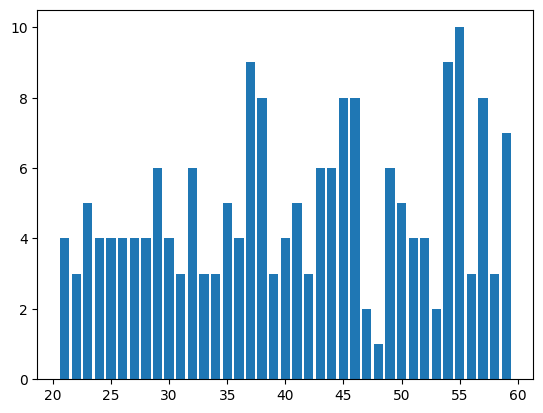

In [205]:
plt.bar(c.index,c.values)

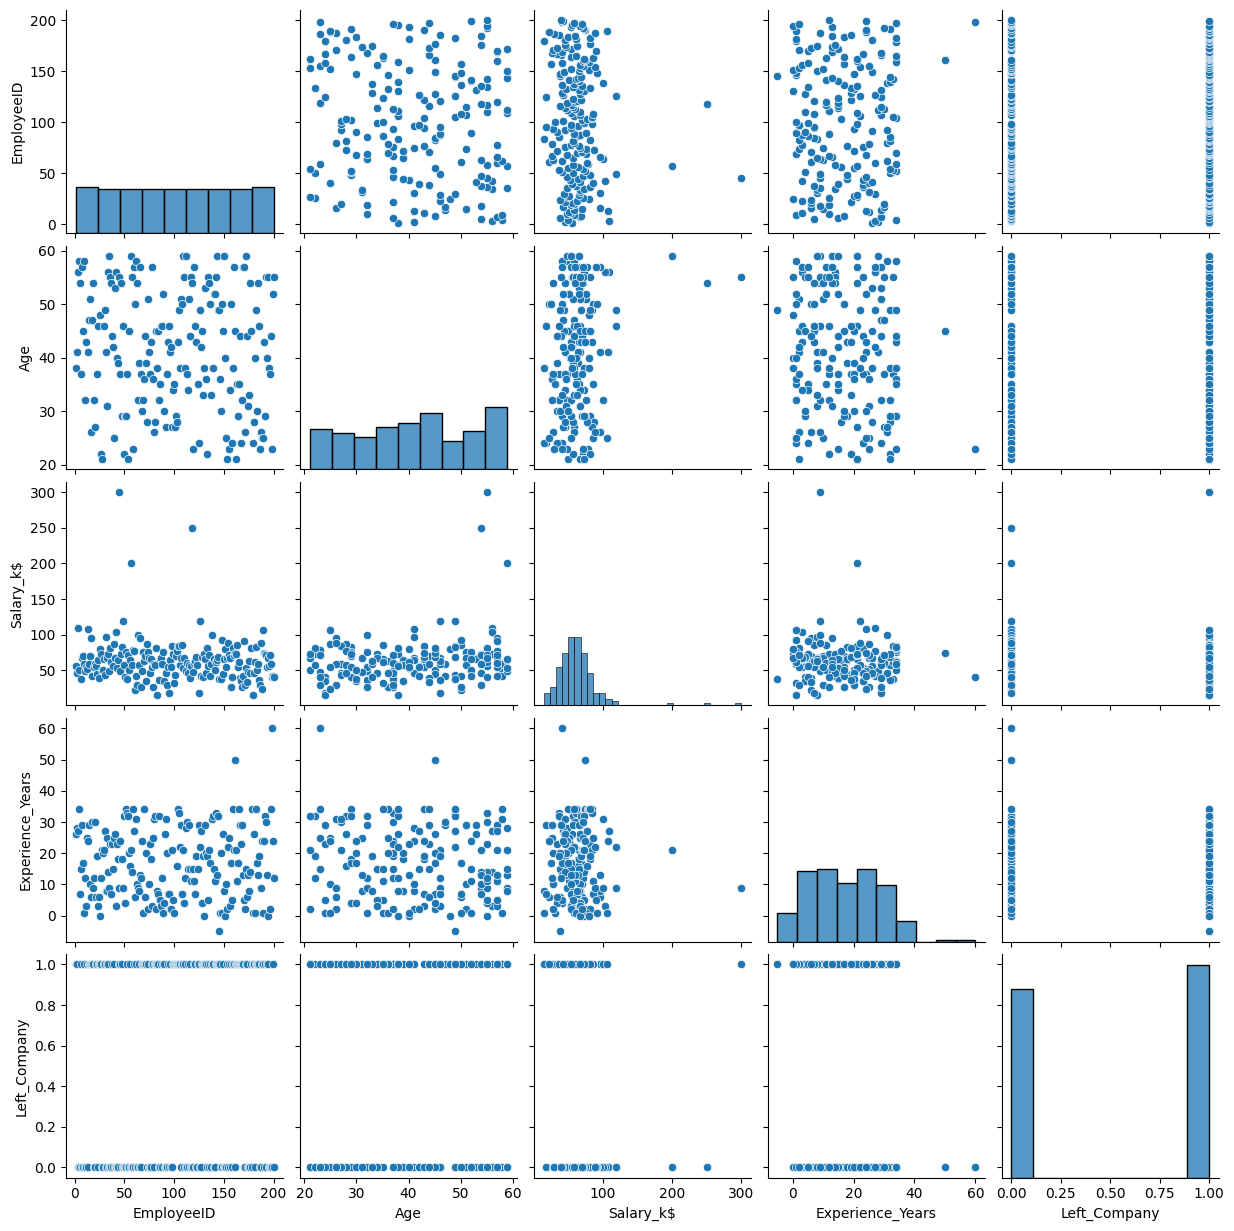

In [206]:
sn.pairplot(data=df)

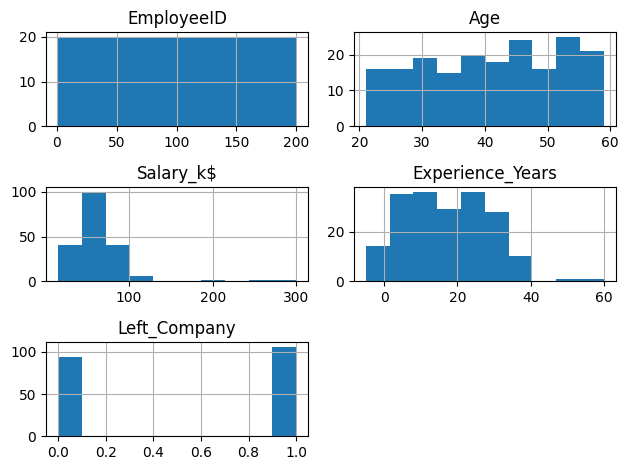

In [207]:
df.hist()
plt.tight_layout()
plt.show()

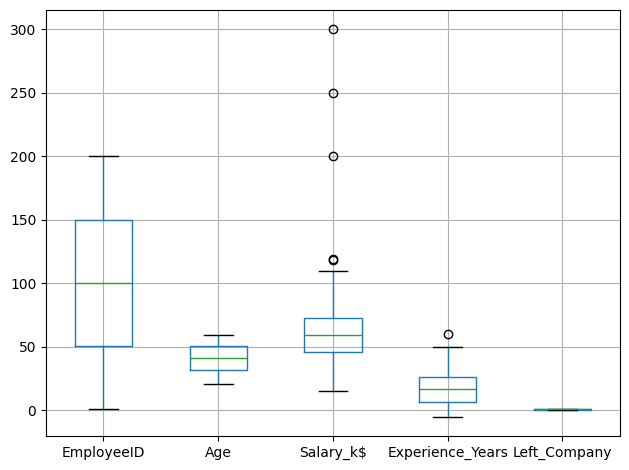

In [208]:
df.boxplot()
plt.tight_layout()
plt.show()

<Axes: ylabel='Age'>

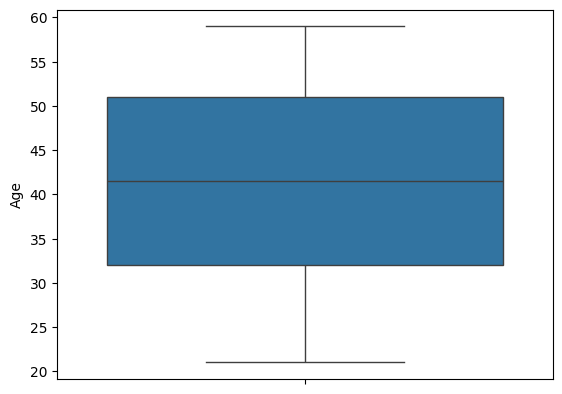

In [209]:
sn.boxplot(y="Age",data=df)

In [210]:
df.loc[df["Age"].isna(),"Age"]

11    NaN
20    NaN
23    NaN
27    NaN
55    NaN
90    NaN
122   NaN
137   NaN
153   NaN
177   NaN
Name: Age, dtype: float64

In [211]:
np.round(df["Age"].mean(),4)

41.2105

In [212]:
df.loc[df["Age"].isna(),"Age"]=np.round(df["Age"].mean(),4)

In [213]:
df.isna().sum()

EmployeeID           0
Name                 0
Age                  0
Department           0
Salary_k$           10
Experience_Years    10
City                 0
Left_Company         0
dtype: int64

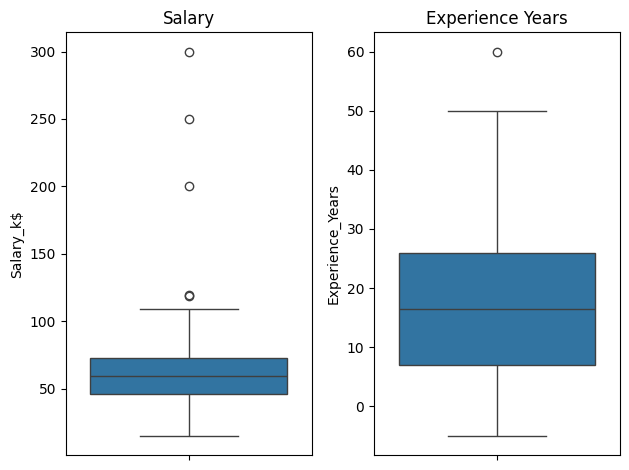

In [214]:
plt.subplot(1,2,1)
plt.title("Salary")
sn.boxplot(y="Salary_k$",data=df)

plt.subplot(1,2,2)
plt.title("Experience Years")
sn.boxplot(y="Experience_Years",data=df)

plt.tight_layout()
plt.show()

In [215]:
df[df["Salary_k$"].isna()]

,EmployeeID,Name,Age,Department,Salary_k$,Experience_Years,City,Left_Company
4,5,Employee_5,54.0000,Sales,NaN,7.0,Pune,0
17,18,Employee_18,54.0000,Sales,NaN,9.0,Bangalore,1
37,38,Employee_38,44.0000,Finance,NaN,23.0,Pune,1
83,84,Employee_84,45.0000,HR,NaN,7.0,Pune,1
90,91,Employee_91,41.2105,Finance,NaN,26.0,Delhi,0
110,111,Employee_111,38.0000,Finance,NaN,12.0,Pune,1
123,124,Employee_124,35.0000,IT,NaN,15.0,Mumbai,1
138,139,Employee_139,38.0000,Sales,NaN,32.0,Mumbai,1
145,146,Employee_146,36.0000,Sales,NaN,1.0,Pune,1
177,178,Employee_178,41.2105,IT,NaN,34.0,Hyderabad,0


In [216]:
df["Salary_k$"].median()

59.575

In [217]:
df.loc[df["Salary_k$"].isna(),"Salary_k$"]=df["Salary_k$"].median()

In [218]:
df[df["Salary_k$"].isna()]

,EmployeeID,Name,Age,Department,Salary_k$,Experience_Years,City,Left_Company


In [219]:
df.isna().sum()


EmployeeID           0
Name                 0
Age                  0
Department           0
Salary_k$            0
Experience_Years    10
City                 0
Left_Company         0
dtype: int64

<Axes: ylabel='Experience_Years'>

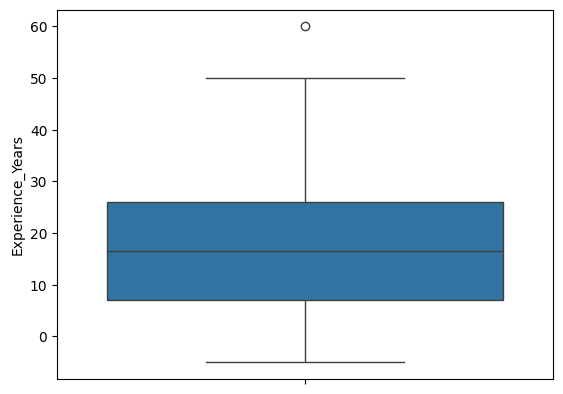

In [220]:
sn.boxplot(y="Experience_Years",data=df)

In [221]:
df["Experience_Years"].median()

16.5

In [222]:
df["Experience_Years"].fillna(df["Experience_Years"].median(),inplace=True)

In [223]:
df.isna().sum()

EmployeeID          0
Name                0
Age                 0
Department          0
Salary_k$           0
Experience_Years    0
City                0
Left_Company        0
dtype: int64

In [224]:
def outlier(data,column):
    uq=data[column].quantile(0.75)
    lq=data[column].quantile(0.25)
    iqr=uq-lq

    ue=uq+1.5*iqr
    le=lq+1.5*iqr
    return lq,uq,iqr,le,ue

In [225]:
outlier(df,"Salary_k$")

(47.7325,
 71.72500000000001,
 23.992500000000007,
 83.72125000000001,
 107.71375000000002)

In [226]:
df.loc[df["Salary_k$"]>107.7138,"Salary_k$"]=107.7137

<Axes: ylabel='Salary_k$'>

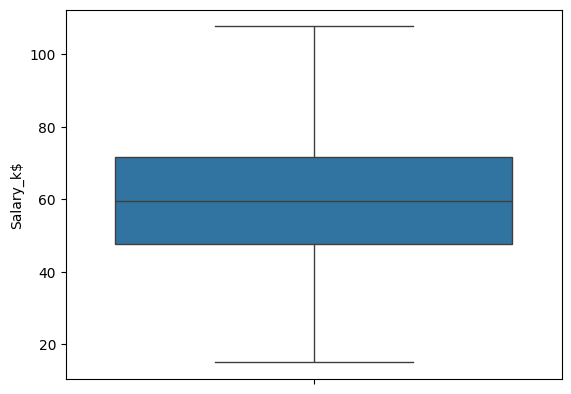

In [227]:
sn.boxplot(y="Salary_k$",data=df)

In [228]:
outlier(df,"Experience_Years")

(8.0, 25.0, 17.0, 33.5, 50.5)

In [229]:
df.loc[df["Experience_Years"]>50.5,"Experience_Years"]=50.5

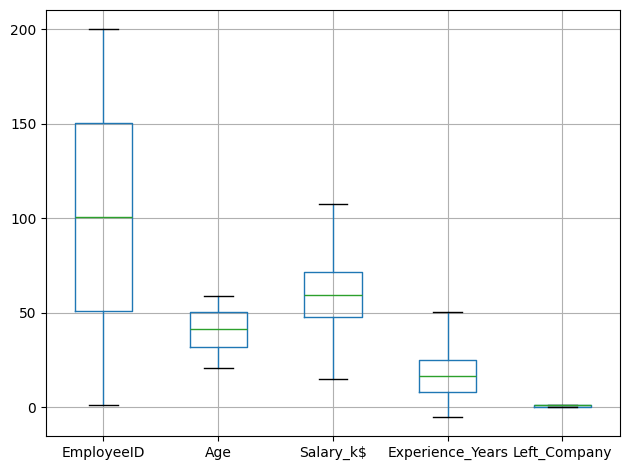

In [230]:
df.boxplot()
plt.tight_layout()
plt.show()

## Questions

### 🔹 Univariate Analysis

What is the average, minimum, and maximum Age of employees?

Plot the distribution of Salary_k$. Does it look normally distributed?

Which department has the highest number of employees?

What percentage of employees have left the company (Left_Company = 1)?

What is the distribution of employees across different cities? 

In [231]:
df["Age"].describe()

count    200.000000
mean      41.210525
std       10.901473
min       21.000000
25%       32.000000
50%       41.210500
75%       50.250000
max       59.000000
Name: Age, dtype: float64

<Axes: xlabel='Salary_k$', ylabel='Count'>

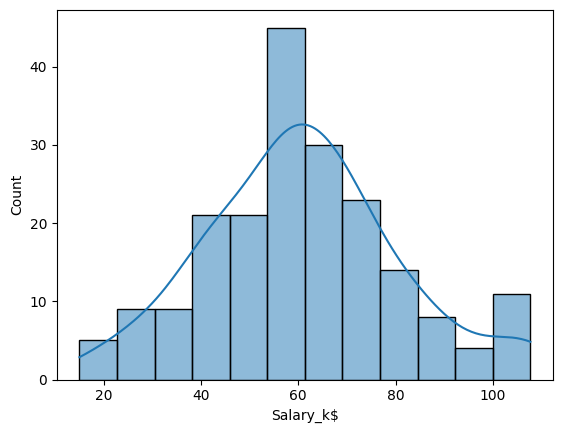

In [232]:
sn.histplot(x="Salary_k$",data=df,kde=True)

Department
Marketing    46
IT           43
Sales        41
HR           35
Finance      35
Name: count, dtype: int64


Text(0.5, 0, 'Departments')

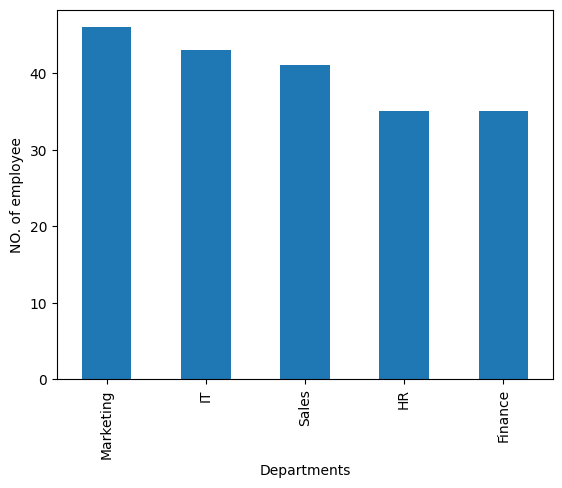

In [233]:
c=df["Department"].value_counts()
print(c)
c.plot(kind="bar")
plt.ylabel("NO. of employee")
plt.xlabel("Departments")

In [234]:
counts = df["Left_Company"].value_counts()
percentages = df["Left_Company"].value_counts(normalize=True) * 100

summary = pd.DataFrame({'Count': counts, 'Percentage': percentages.round(2)})
print(summary)


              Count  Percentage
Left_Company                   
1               106        53.0
0                94        47.0


City
Hyderabad    48
Pune         45
Delhi        40
Mumbai       36
Bangalore    31
Name: count, dtype: int64


Text(0.5, 0, 'City')

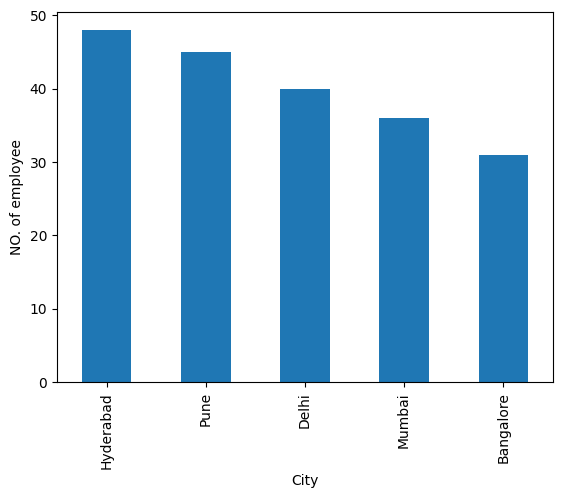

In [235]:
c=df["City"].value_counts()
print(c)
c.plot(kind="bar")
plt.ylabel("NO. of employee")
plt.xlabel("City")

### 🔹 Bivariate Analysis

Compare Salary across different Departments. Which department has the highest average salary?

Is there a relationship between Age and Experience_Years? (scatter plot + correlation)

Do employees who left the company (Left_Company = 1) have lower average salaries compared to those who stayed?

Is there a difference in average salary across Cities?

Compare the distribution of Age between employees who stayed vs. who left.

Department
Marketing    62.873204
IT           62.442265
Finance      60.353391
HR           59.629963
Sales        58.780822
Name: Salary_k$, dtype: float64
Marketing have the highest avg. salary of 62.87320434782608


<BarContainer object of 5 artists>

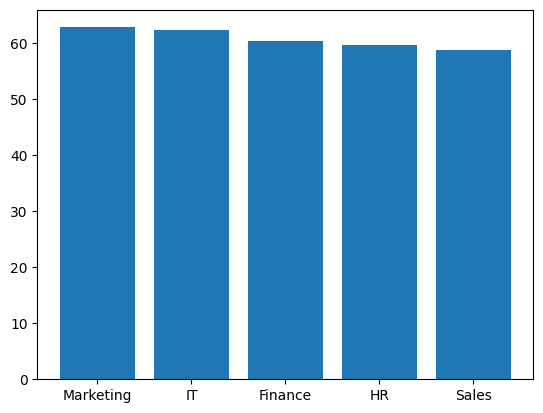

In [236]:
c=df.groupby("Department")["Salary_k$"].mean().sort_values(ascending=False)
print(c)
print(f"{c.idxmax()} have the highest avg. salary of {c.max()}")
plt.bar(c.index,c.values)

                  Experience_Years       Age
Experience_Years          1.000000 -0.108815
Age                      -0.108815  1.000000


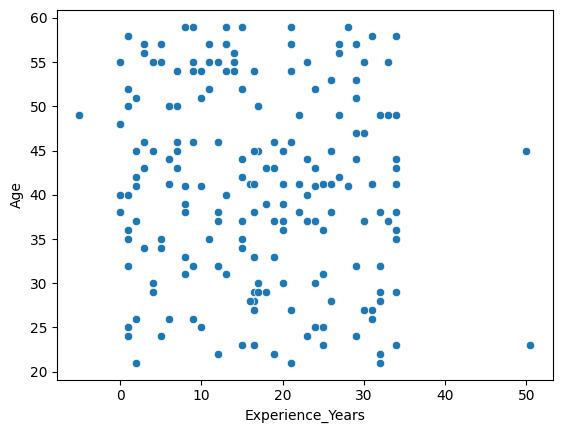

In [237]:
sn.scatterplot(x="Experience_Years",y="Age",data=df)
print(df[["Experience_Years","Age"]].corr())

In [241]:
df.groupby("Left_Company")["Salary_k$"].mean()


Left_Company
0    63.537417
1    58.623573
Name: Salary_k$, dtype: float64

In [244]:
df.groupby("City")["Salary_k$"].mean()

City
Bangalore    60.581894
Delhi        60.155625
Hyderabad    65.735621
Mumbai       58.886111
Pune         58.380942
Name: Salary_k$, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

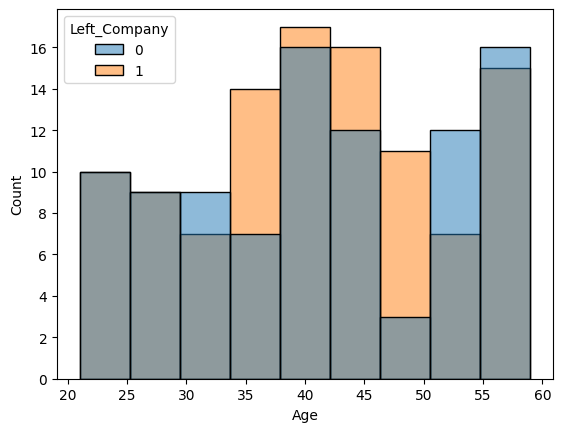

In [245]:
sn.histplot(x="Age",hue="Left_Company",data=df)

<Axes: xlabel='Left_Company', ylabel='Age'>

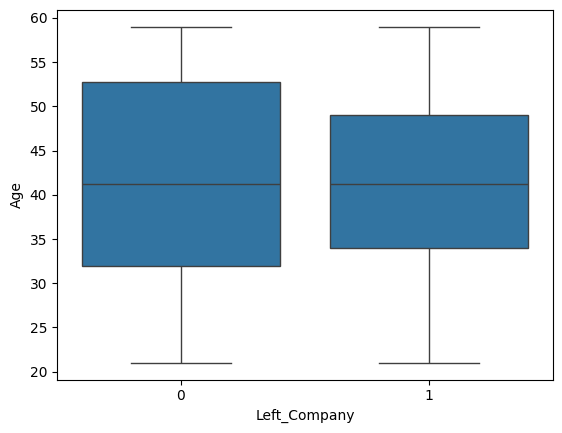

In [246]:
sn.boxplot(x='Left_Company', y='Age', data=df)